# Statistika prometnih nesreč
### od 2009 do 2022

**`Tim Povše, Anže Goršek, Tim Jevšenak`**

## Podatki
>Podatki so za vsako leto shranjeni v enakem formatu...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 1000


years = range(2009, 2023)
data_list = []

for year in years:
    filename = f"promet-nesrece-podatki/pn{year}.csv"
    df = pd.read_csv(filename, sep=";", encoding="windows-1250")
    df["year"] = year
    data_list.append(df)

dataAll = pd.concat(data_list, ignore_index=True)

#### 2009 - 2022

In [3]:
#PREDPRIPRAVA PODATKOV
dataAll['VrednostAlkotesta'] = dataAll['VrednostAlkotesta'].str.replace(',', '.').astype(float)
dataAll.describe(include='all')

,ZaporednaStevilkaPN,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,StacionazaDogodka,OpisKraja,VzrokNesrece,TipNesrece,VremenskeOkoliscine,StanjePrometa,StanjeVozisca,VrstaVozisca,GeoKoordinataX,GeoKoordinataY,ZaporednaStevilkaOsebeVPN,Povzrocitelj,Starost,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,VrednostAlkotesta,VrednostStrokovnegaPregleda,year
count,486715.000000,486715,486349,486715,486715.000000,486715,486715,486715,486715,486715,486715.000000,486715,486715.000000,486715,486715,486715,486715,486715,486715,486715,486715.000000,486715.000000,4.867150e+05,484826,486715.000000,486239,434027,485151,484674,484674,484674,486715.000000,486715.000000,486715.000000,486715,486715.000000
unique,NaN,4,58,5113,NaN,2,2,11,6440,6428,NaN,5647,NaN,11,11,10,8,7,12,8,NaN,NaN,NaN,2,NaN,4,65,137,5,27,3,NaN,NaN,NaN,345,NaN
top,NaN,Z MATERIALNO ŠKODO,LJUBLJANA,25.03.2013,NaN,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,25001,LJUBLJANA,NaN,NI ODSEKOV,NaN,CESTA,PREMIKI Z VOZILOM,BOČNO TRČENJE,JASNO,TEKOČ (NORMALEN),SUHO,HRAPAV ASFALT / BETON,NaN,NaN,NaN,UDELEŽENEC,NaN,MOŠKI,LJUBLJANA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,NaN,NaN,NaN,",00",NaN
freq,NaN,299028,96962,358,NaN,330654,306538,240712,69687,69687,NaN,79938,NaN,369412,114661,103975,272324,179447,352287,286028,NaN,NaN,NaN,256825,NaN,333424,69105,428300,358758,343280,387403,NaN,NaN,NaN,480298,NaN
mean,9637.013984,NaN,NaN,NaN,13.495206,NaN,NaN,NaN,NaN,NaN,4525.794539,NaN,1454.521632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109223.427102,469302.480199,9.637016e+06,NaN,41.307346,NaN,NaN,NaN,NaN,NaN,NaN,13.940039,3.738251,0.033568,NaN,2015.085142
std,5697.370841,NaN,NaN,NaN,5.034438,NaN,NaN,NaN,NaN,NaN,10933.830099,NaN,3191.971344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39965.669033,116169.095249,5.697371e+06,NaN,16.889534,NaN,NaN,NaN,NaN,NaN,NaN,14.520662,3.802287,0.161758,NaN,4.060817
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.001000e+03,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,2009.000000
25%,4748.000000,NaN,NaN,NaN,10.050000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91718.000000,451171.000000,4.748002e+06,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,2011.000000
50%,9526.000000,NaN,NaN,NaN,14.020000,NaN,NaN,NaN,NaN,NaN,173.000000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111815.000000,475426.000000,9.526002e+06,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,3.000000,0.000000,NaN,2015.000000
75%,14300.000000,NaN,NaN,NaN,17.250000,NaN,NaN,NaN,NaN,NaN,1204.000000,NaN,1023.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139185.000000,538731.500000,1.430000e+07,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,7.000000,0.000000,NaN,2019.000000


Z MATERIALNO ŠKODO          299028
Z LAŽJO TELESNO POŠKODBO    162773
S HUDO TELESNO POŠKODBO      21219
S SMRTNIM IZIDOM              3695
Name: KlasifikacijaNesrece, dtype: int64


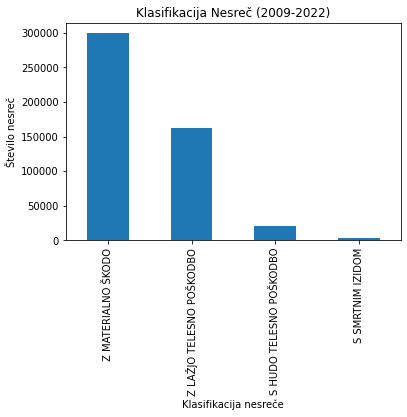

In [4]:
perClass = dataAll['KlasifikacijaNesrece'].value_counts()
print(perClass)

# Bar plot za št. nesreč na klasifikacijo
perClass.plot(kind='bar')
plt.title('Klasifikacija Nesreč (2009-2022)')
plt.xlabel('Klasifikacija nesreče')
plt.ylabel('Število nesreč')
plt.show()

DatumPN
1     35860
2     33294
3     38207
4     36698
5     42162
6     44959
7     42755
8     43558
9     44748
10    44600
11    38497
12    41377
Name: DatumPN, dtype: int64


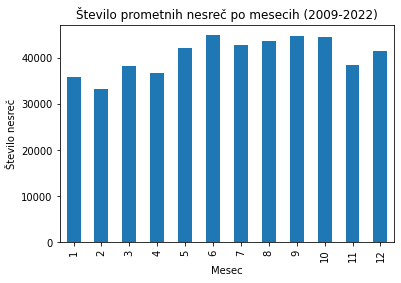

In [5]:
dataAll['DatumPN'] = pd.to_datetime(dataAll['DatumPN'], format='%d.%m.%Y')
perMonth = dataAll.groupby(dataAll['DatumPN'].dt.month)['DatumPN'].count()
print(perMonth)

# Bar plot za št. nesreč po mesecih
perMonth.plot(kind='bar')
plt.title('Število prometnih nesreč po mesecih (2009-2022)')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.show()

0-21      52876
21-40    201413
40-60    161041
60+       70499
Name: age_group, dtype: int64


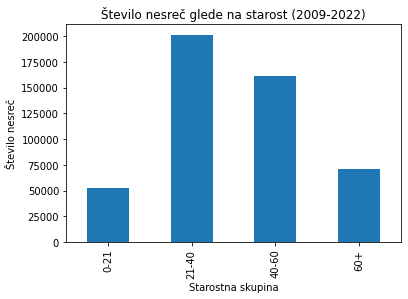

In [6]:
dataForAgeManipulation = dataAll.copy()
dataForAgeManipulation = dataForAgeManipulation[dataForAgeManipulation["Starost"] > 0] #Izbris oziroma neupoštevanje podatkov, kjer je startost enaka 0 ali -1
dataForAgeManipulation['Starost'] = pd.to_numeric(
    dataForAgeManipulation['Starost'], errors='coerce').fillna(0).astype(int)
bins = [0, 21, 40, 60, float('inf')]
labels = ['0-21', '21-40', '40-60', '60+']
dataForAgeManipulation['age_group'] = pd.cut(
    dataForAgeManipulation['Starost'], bins=bins, labels=labels)
perAge = dataForAgeManipulation['age_group'].value_counts().sort_index()
print(perAge)

# Bar plot za št. nesreč glede na starostno skupino
perAge.plot(kind='bar')
plt.title('Število nesreč glede na starost (2009-2022)')
plt.xlabel('Starostna skupina')
plt.ylabel('Število nesreč')
plt.show()

In [39]:
accidentsCountPerGenderAndAge = dataAll[(dataAll['Spol'] != 'NI PODATKA') & (dataAll['Spol'] != 'NEZNAN')].groupby(['Spol', pd.cut(dataAll['Starost'], [0, 21, 40, 60, 200], labels=['0-21', '21-40', '40-60', '60+'])]).size().reset_index(name='Count')

print(accidentsCountPerGenderAndAge)

     Spol Starost   Count
0   MOŠKI    0-21   34998
1   MOŠKI   21-40  137254
2   MOŠKI   40-60  110922
3   MOŠKI     60+   50008
4  ŽENSKI    0-21   17878
5  ŽENSKI   21-40   64159
6  ŽENSKI   40-60   50117
7  ŽENSKI     60+   20484


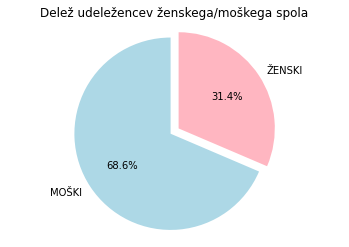

In [36]:
dataFilterForGender = dataAll[(dataAll['Spol'] != 'NI PODATKA') & (dataAll['Spol'] != 'NEZNAN')]

dataWithGenderCount = dataFilterForGender['Spol'].value_counts()

genderPercentage = dataWithGenderCount / dataWithGenderCount.sum() * 100

labels = genderPercentage.index
sizes = genderPercentage.values
colors = ['lightblue', 'lightpink']
explode = (0.1, 0) 
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Delež udeležencev ženskega/moškega spola')
plt.show()

LJUBLJANA                    69687
MARIBOR                      35713
ŠENTILJ-MB-CE-LJ-PO-SRMIN    30690
KARAVANKE-LJ-NM-OBREŽJE      13698
CELJE                        12833
KOPER                         8281
KRANJ                         7749
PTUJ                          7535
VIČ-DRAVOGRAD-MB-MIKLAVŽ      4623
DRAVOGRAD-SG-ARJA VAS         4485
NOVO MESTO                    4448
VELENJE                       4380
PRIKLJ.CELJE ZAHOD-DRNOVO     3288
Z.JEZERS.-ŽELIN-ŠL-JEPRCA     3152
MARIBOR-M.SOBOTA-PINCE        2977
SLOVENSKA BISTRICA            2963
LJ ZADOBROVA-KOSEZE           2892
NOVA GORICA                   2854
LJ JUG-ŠKOFLJICA-ŠM.SAP       2806
SLOV.BISTRICA-SRED. OB DR     2717
KAMNIK                        2693
MURSKA SOBOTA                 2538
KRANJ V-BRNIK-TRZIN-LJ        2530
PESNICA-MB-SL.BISTR-CELJE     2454
DOMŽALE                       2284
LJ ČRNUČE - ZIDANI MOST       2245
OSTALE LOKALNE CESTE          2206
PERŠETI-N.GORICA-ŠEMPETER     2205
IZOLA               

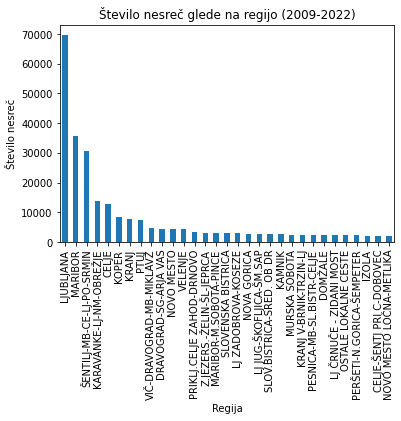

In [8]:
perRegion = dataAll['TekstCesteNaselja'].value_counts()
print(perRegion[perRegion > 2000])

#Bar plot za št. nesreč po regijah
perRegion[perRegion > 2000].plot(kind='bar')
plt.title('Število nesreč glede na regijo (2009-2022)')
plt.xlabel('Regija')
plt.ylabel('Število nesreč')
plt.show()

***ALKOHOLIZIRANI POVZROČITELJI 2009-2022***

In [9]:
dui_by_year = dataAll[(dataAll["VrednostAlkotesta"] > 0.24) | (((dataAll["Starost"] < 21) | (dataAll['VozniskiStazVLetih'] < 2))
                                                               & dataAll["VrednostAlkotesta"] > 0) & (dataAll["Povzrocitelj"] == "POVZROČITELJ")].groupby("year").size()

all_by_year = dataAll[dataAll["Povzrocitelj"] == "POVZROČITELJ"].groupby("year").size()

result = pd.concat([dui_by_year, all_by_year], axis=1, keys=["DUI", "ALL"])
result["DUI/ALL%"] = result["DUI"] / result["ALL"] *100

result.loc["Total"] = [result["DUI"].sum(), result["ALL"].sum(), result["DUI"].sum() / result["ALL"].sum() * 100]

print(result)

           DUI       ALL   DUI/ALL%
year                               
2009    2177.0   18313.0  11.887730
2010    1881.0   19499.0   9.646649
2011    1725.0   19834.0   8.697187
2012    1705.0   18580.0   9.176534
2013    1619.0   15991.0  10.124445
2014    1490.0   15506.0   9.609184
2015    1522.0   15438.0   9.858790
2016    1839.0   15666.0  11.738797
2017    1521.0   15161.0  10.032320
2018    1465.0   15589.0   9.397652
2019    1535.0   16107.0   9.530018
2020    1331.0   12666.0  10.508448
2021    1500.0   14396.0  10.419561
2022    1587.0   15255.0  10.403147
Total  22897.0  228001.0  10.042500


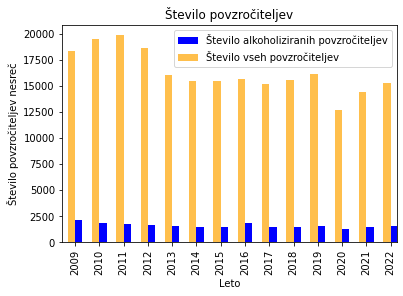

In [10]:
fig, ax = plt.subplots()

dui_by_year.plot(kind='bar', ax=ax, color='blue', position=0, width=0.3)



all_by_year.plot(kind='bar', ax=ax, color='orange',
                 alpha=0.7, position=1, width=0.3)

ax.set_ylabel('Število povzročiteljev nesreč')
ax.set_title('Število povzročiteljev')
ax.set_xlabel('Leto')

ax.legend(['Število alkoholiziranih povzročiteljev',
          'Število vseh povzročiteljev'], loc='upper right')

plt.show()


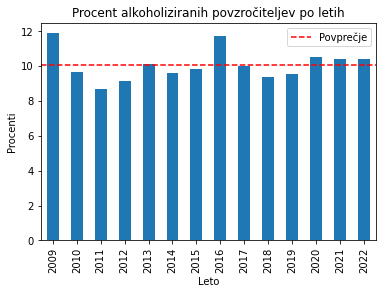

In [11]:
result["DUI/ALL%"][:-1].plot(kind='bar')
plt.title('Procent alkoholiziranih povzročiteljev po letih')
plt.ylabel('Procenti')
plt.xlabel('Leto')
plt.axhline(y=result["DUI/ALL%"]["Total"], color='red', linestyle='--')
plt.legend(['Povprečje'], loc='upper right')
plt.show()

***UPORABA VARNOSTNEGA PASU***

**UDELEŽENCI**

In [12]:
seat_belt_by_year = dataAll[dataAll["UporabaVarnostnegaPasu"] == "DA"].groupby("year").size()
without_seat_belt_year = dataAll[dataAll["UporabaVarnostnegaPasu"]
                      == "NE"].groupby("year").size()

result = pd.concat([seat_belt_by_year, without_seat_belt_year],
                   axis=1, keys=["SB", "WSB"])
result["SB%"] = result["SB"] / (result["SB"] + result["WSB"]) * 100

result.loc["Total"] = [result["SB"].sum(), result["WSB"].sum(
), (result["SB"].sum() / (result["SB"].sum() + result["WSB"].sum()) * 100)]

print(result)

             SB      WSB        SB%
year                               
2009    32384.0   2551.0  92.697867
2010    33794.0   2610.0  92.830458
2011    34465.0   2975.0  92.053953
2012    32349.0   2876.0  91.835344
2013    27476.0   2750.0  90.901873
2014    26294.0   2621.0  90.935501
2015    26219.0   2622.0  90.908776
2016    26417.0   2786.0  90.459884
2017    25600.0   2622.0  90.709376
2018    26677.0   2728.0  90.722666
2019    27075.0   3033.0  89.926265
2020    20503.0   2678.0  88.447435
2021    23468.0   3017.0  88.608646
2022    24682.0   2942.0  89.349841
Total  387403.0  38811.0  90.894011


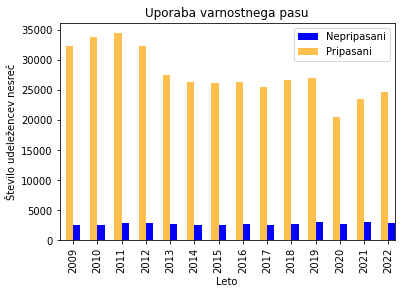

In [13]:
fig, ax = plt.subplots()

without_seat_belt_year.plot(
    kind='bar', ax=ax, color='blue', position=0, width=0.3)


seat_belt_by_year.plot(kind='bar', ax=ax, color='orange',
                 alpha=0.7, position=1, width=0.3)

ax.set_ylabel('Število udeležencev nesreč')
ax.set_title('Uporaba varnostnega pasu')
ax.set_xlabel('Leto')

ax.legend(['Nepripasani',
          'Pripasani'], loc='upper right')

plt.show()

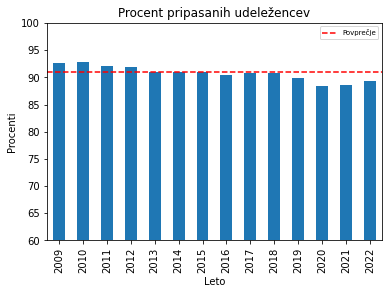

In [14]:
result["SB%"][:-1].plot(kind='bar')
plt.title('Procent pripasanih udeležencev')
plt.ylabel('Procenti')
plt.xlabel('Leto')
plt.axhline(y=result["SB%"]["Total"], color='red', linestyle='--')
plt.legend(['Povprečje'], loc='upper right', fontsize='x-small')
plt.ylim([60, 100])
plt.show()

**VOZNIKI OSEBNIH AVTOMOBILOV**

In [15]:
drivers_seat_belt_by_year = dataAll[(dataAll["UporabaVarnostnegaPasu"] == "DA") & (dataAll["VrstaUdelezenca"] == "VOZNIK OSEBNEGA AVTOMOBILA")].groupby(
    "year").size()
drivers_without_seat_belt_year = dataAll[dataAll["UporabaVarnostnegaPasu"]
                                 == "NE"].groupby("year").size()

result = pd.concat([drivers_seat_belt_by_year, drivers_without_seat_belt_year],
                   axis=1, keys=["SB", "WSB"])
result["SB%"] = result["SB"] / (result["SB"] + result["WSB"]) * 100

result.loc["Total"] = [result["SB"].sum(), result["WSB"].sum(
), (result["SB"].sum() / (result["SB"].sum() + result["WSB"].sum()) * 100)]

print(result)


             SB      WSB        SB%
year                               
2009    24975.0   2551.0  90.732398
2010    26598.0   2610.0  91.064092
2011    27411.0   2975.0  90.209307
2012    25751.0   2876.0  89.953540
2013    21446.0   2750.0  88.634485
2014    20561.0   2621.0  88.693814
2015    20200.0   2622.0  88.511086
2016    20594.0   2786.0  88.083832
2017    19711.0   2622.0  88.259526
2018    20418.0   2728.0  88.213946
2019    20891.0   3033.0  87.322354
2020    15514.0   2678.0  85.279244
2021    17678.0   3017.0  85.421599
2022    18492.0   2942.0  86.274144
Total  300240.0  38811.0  88.553050


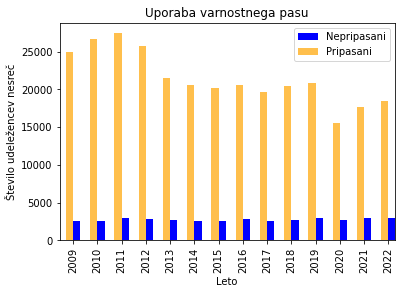

In [16]:
fig, ax = plt.subplots()

drivers_without_seat_belt_year.plot(
    kind='bar', ax=ax, color='blue', position=0, width=0.3)


drivers_seat_belt_by_year.plot(kind='bar', ax=ax, color='orange',
                       alpha=0.7, position=1, width=0.3)

ax.set_ylabel('Število udeležencev nesreč')
ax.set_title('Uporaba varnostnega pasu')
ax.set_xlabel('Leto')

ax.legend(['Nepripasani',
          'Pripasani'], loc='upper right')

plt.show()


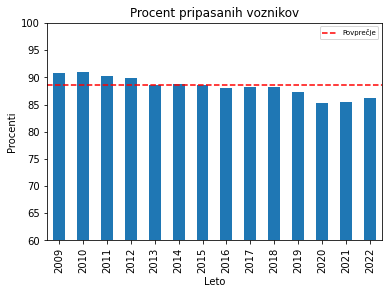

In [17]:
result["SB%"][:-1].plot(kind='bar')
plt.title('Procent pripasanih voznikov')
plt.ylabel('Procenti')
plt.xlabel('Leto')
plt.axhline(y=result["SB%"]["Total"], color='red', linestyle='--')
plt.legend(['Povprečje'], loc='upper right', fontsize='x-small')
plt.ylim([60, 100])
plt.show()


***ŠTEVILO HUDIH PROMETNIH NESREČ***

C:\Users\timje\AppData\Local\Temp/ipykernel_26248/3732819738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worstCaseWrecks.loc['DatumPN'] = pd.to_datetime(worstCaseWrecks['DatumPN'], format='%d.%m.%Y')


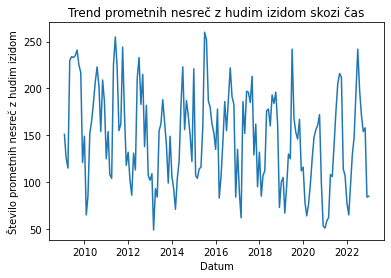

In [18]:
worstCaseWrecks = dataAll[dataAll['KlasifikacijaNesrece'].str.contains('HUDO|SMRTNIM', case=False)]
worstCaseWrecks.loc['DatumPN'] = pd.to_datetime(worstCaseWrecks['DatumPN'], format='%d.%m.%Y')
worstCaseWrecks = worstCaseWrecks.groupby(pd.Grouper(key='DatumPN', freq='M')).size().reset_index(name='Stevilo')

plt.plot(worstCaseWrecks['DatumPN'], worstCaseWrecks['Stevilo'])
plt.xlabel('Datum')
plt.ylabel('Število prometnih nesreč z hudim izidom')
plt.title('Trend prometnih nesreč z hudim izidom skozi čas')
plt.show()

***KORELACIJA MED HUDO TELESNO POŠKODBO IN NEUPORABO VARNOSTNEGA PASU***

In [19]:
worst_case_wrecks_with_seat_belt = len(dataAll[(dataAll['KlasifikacijaNesrece'].str.contains(
    'HUDO|SMRTNIM', case=False)) & (dataAll["UporabaVarnostnegaPasu"] == "DA")])
worst_case_wrecks_without_seat_belt = len(dataAll[dataAll['KlasifikacijaNesrece'].str.contains(
    'HUDO|SMRTNIM', case=False) & (dataAll["UporabaVarnostnegaPasu"] == "NE")])

wrecks_with_death_with_seat_belt = len(dataAll[(dataAll['KlasifikacijaNesrece'].str.contains(
    'SMRTNIM', case=False)) & (dataAll["UporabaVarnostnegaPasu"] == "DA")])
wrecks_with_death_without_seat_belt = len(dataAll[(dataAll['KlasifikacijaNesrece'].str.contains(
    'SMRTNIM', case=False)) & (dataAll["UporabaVarnostnegaPasu"] == "NE")])

seat_belt = seat_belt_by_year.sum()
without_seat_belt = without_seat_belt_year.sum()

percantage_for_worst_case_wrecks_with_seat_belt = worst_case_wrecks_with_seat_belt / seat_belt * 100
percantage_for_worst_case_wrecks_without_seat_belt = worst_case_wrecks_without_seat_belt / without_seat_belt * 100
percantage_for_wrecks_with_death_seat_belt = wrecks_with_death_with_seat_belt / seat_belt * 100
percantage_for_wrecks_with_death_without_seat_belt = wrecks_with_death_without_seat_belt / without_seat_belt * 100

result_worst_case_wrecks = [[worst_case_wrecks_with_seat_belt, seat_belt, percantage_for_worst_case_wrecks_with_seat_belt],[worst_case_wrecks_without_seat_belt, without_seat_belt, percantage_for_worst_case_wrecks_without_seat_belt]]
result_wrecks_with_death = [[wrecks_with_death_with_seat_belt, seat_belt, percantage_for_wrecks_with_death_seat_belt], [wrecks_with_death_without_seat_belt, without_seat_belt, percantage_for_wrecks_with_death_without_seat_belt]]

#print("Nesreče s hudo telesno poškodbo ali smrtnim izidom:")
#print("Pripasani: {} {} {:.2f}%".format(
#    result_worst_case_wrecks[0][0], result_worst_case_wrecks[0][1], result_worst_case_wrecks[0][2]))
#print("Nepripasani: {} {} {:.2f}%".format(
#    result_worst_case_wrecks[1][0], result_worst_case_wrecks[1][1], result_worst_case_wrecks[1][2]))
#
#print("\nNesreče s smrtnim izidom:")
#print("Pripasani: {} {} {:.2f}%".format(
#    result_wrecks_with_death[0][0], result_wrecks_with_death[0][1], result_wrecks_with_death[0][2]))
#print("Nepripasani: {} {} {:.2f}%".format(
#    result_wrecks_with_death[1][0], result_wrecks_with_death[1][1], result_wrecks_with_death[1][2]))

df_worst_case_wrecks = pd.DataFrame(result_worst_case_wrecks, columns=[
                                    "hude nesreče", "vse nesreče", "%"])
df_wrecks_with_death = pd.DataFrame(result_wrecks_with_death, columns=[
                                    "smrtne nesreče", "vse nesreče", "%"])
print("Nesreče s hudo telesno poškodbo ali smrtnim izidom:")
print(df_worst_case_wrecks)
print("Udeleženec prometne nesreče, ki ni pripasan, ima {:.2f}% večjo verjetnost, da utrpi hujše poškodbe ali smrtne posledice.".format(
    result_worst_case_wrecks[1][2] / result_worst_case_wrecks[0][2] * 100))

print("\nNesreče s smrtnim izidom:")
print(df_wrecks_with_death)
print("Udeleženec prometne nesreče, ki ni pripasan, ima {:.2f}% večjo verjetnost, da utrpi smrtne posledice.".format(
    result_wrecks_with_death[1][2] / result_wrecks_with_death[0][2] * 100))


Nesreče s hudo telesno poškodbo ali smrtnim izidom:
   hude nesreče  vse nesreče          %
0         17308       387403   4.467699
1          4924        38811  12.687125
Udeleženec prometne nesreče, ki ni pripasan, ima 283.97% večjo verjetnost, da utrpi hujše poškodbe ali smrtne posledice.

Nesreče s smrtnim izidom:
   smrtne nesreče  vse nesreče         %
0            2429       387403  0.626996
1             824        38811  2.123109
Udeleženec prometne nesreče, ki ni pripasan, ima 338.62% večjo verjetnost, da utrpi smrtne posledice.


***KAKO STANJE VOZIŠČA IN VRSTA VOZIŠČA TER STANJE PROMETA VPLIVAJO NA NASTANEK PROMETNE NESREČE?(UPORABA CHATGPT)***

In [20]:
#Predpriprava podatkov za Chatgpt
road_condition_options = dataAll['StanjeVozisca'].unique()
traffic_status_options = dataAll['StanjePrometa'].unique()
road_type_options = dataAll['VrstaVozisca'].unique()

#Chatgpt code

# Number of car crashes for each unique value in "StanjeVozisca" and calculate percentage
stanje_vozisca_counts = dataAll["StanjeVozisca"].value_counts()
stanje_vozisca_percentage = (stanje_vozisca_counts / len(dataAll)) * 100
stanje_vozisca_df = pd.DataFrame({
    'Count': stanje_vozisca_counts,
    'Percentage': stanje_vozisca_percentage
})

# Number of car crashes for each unique value in "StanjePrometa" and calculate percentage
stanje_prometa_counts = dataAll["StanjePrometa"].value_counts()
stanje_prometa_percentage = (stanje_prometa_counts / len(dataAll)) * 100
stanje_prometa_df = pd.DataFrame({
    'Count': stanje_prometa_counts,
    'Percentage': stanje_prometa_percentage
})

# Number of car crashes for each unique value in "VrstaVozisca" and calculate percentage
vrsta_vozisca_counts = dataAll["VrstaVozisca"].value_counts()
vrsta_vozisca_percentage = (vrsta_vozisca_counts / len(dataAll)) * 100
vrsta_vozisca_df = pd.DataFrame({
    'Count': vrsta_vozisca_counts,
    'Percentage': vrsta_vozisca_percentage
})

print("Stanje vozišča")
print(stanje_vozisca_df)

Stanje vozišča
                          Count  Percentage
SUHO                     352287   72.380551
MOKRO                    106510   21.883443
SPOLZKO                    9888    2.031579
OSTALO                     6539    1.343497
SNEŽENO - NEPLUŽENO        4826    0.991545
SNEŽENO - PLUŽENO          3648    0.749515
POLEDENELO - NEPOSIPANO    1479    0.303874
POLEDENELO - POSIPANO      1274    0.261755
BLATNO                      226    0.046434
POŠKODOVANO                  17    0.003493
UDARNE JAME                  16    0.003287
KOLESNICE                     5    0.001027


In [21]:
print("\nStanje prometa")
print(stanje_prometa_df)


Stanje prometa
                   Count  Percentage
TEKOČ (NORMALEN)  179447   36.869010
REDEK             108214   22.233545
NORMALEN           96444   19.815292
GOST               73354   15.071243
NEZNANO            26452    5.434803
ZASTOJI             2275    0.467419
KOLONA VOZIL         529    0.108688


In [22]:
print("\nVrsta vozišča")
print(vrsta_vozisca_df)


Vrsta vozišča
                         Count  Percentage
HRAPAV  ASFALT / BETON  286028   58.767040
ZGLAJEN ASFALT / BETON  153207   31.477764
ASFALT                   32945    6.768848
MAKADAM                   8220    1.688873
OSTALO                    4118    0.846080
NERAVEN ASFALT / BETON    1698    0.348869
BETON                      335    0.068829
TLAKOVANO VOZIŠČE          164    0.033695


In [23]:
# Group the data by the fields "StanjeVozisca," "StanjePrometa," and "VrstaVozisca" and calculate count and percentage
grouped_data = dataAll.groupby(
    ["StanjeVozisca", "StanjePrometa", "VrstaVozisca"]).size().reset_index(name='Count')
grouped_data["Percentage"] = (grouped_data["Count"] / len(dataAll)) * 100

# Sort the DataFrame by count in descending order
sorted_data = grouped_data.sort_values(by='Count', ascending=False)

# Create a new pandas DataFrame
result_df = sorted_data.copy()

print(result_df)

    StanjeVozisca     StanjePrometa            VrstaVozisca  Count  Percentage
280          SUHO  TEKOČ (NORMALEN)  HRAPAV  ASFALT / BETON  82769   17.005640
265          SUHO          NORMALEN  HRAPAV  ASFALT / BETON  42942    8.822822
272          SUHO             REDEK  HRAPAV  ASFALT / BETON  41385    8.502923
285          SUHO  TEKOČ (NORMALEN)  ZGLAJEN ASFALT / BETON  39006    8.014136
248          SUHO              GOST  HRAPAV  ASFALT / BETON  33828    6.950269
..            ...               ...                     ...    ...         ...
222       SPOLZKO              GOST                  OSTALO      1    0.000205
240       SPOLZKO  TEKOČ (NORMALEN)                 MAKADAM      1    0.000205
256          SUHO      KOLONA VOZIL                 MAKADAM      1    0.000205
20      KOLESNICE             REDEK                  ASFALT      1    0.000205
296   UDARNE JAME             REDEK       TLAKOVANO VOZIŠČE      1    0.000205

[297 rows x 5 columns]


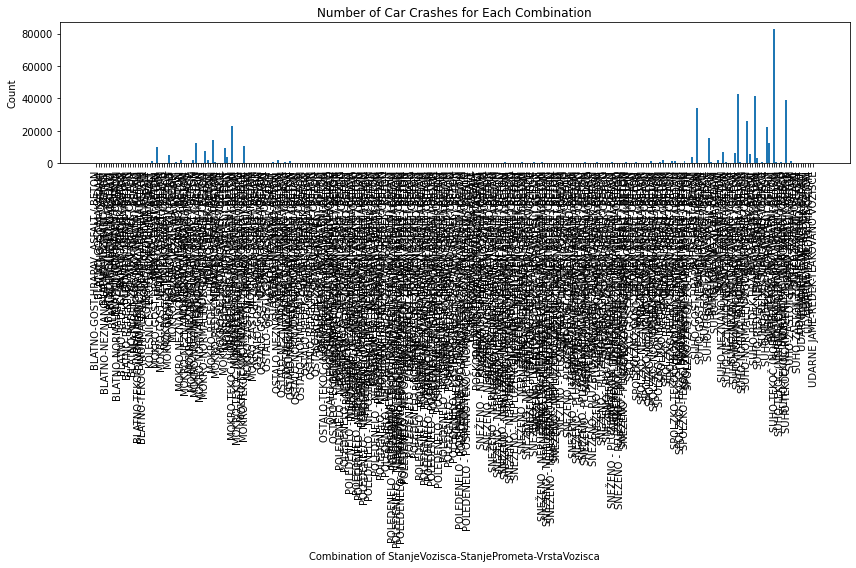

In [24]:
# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(result_df.index, result_df['Count'])
plt.xticks(result_df.index, result_df['StanjeVozisca'] + '-' +
           result_df['StanjePrometa'] + '-' + result_df['VrstaVozisca'], rotation=90)
plt.xlabel('Combination of StanjeVozisca-StanjePrometa-VrstaVozisca')
plt.ylabel('Count')
plt.title('Number of Car Crashes for Each Combination')
plt.tight_layout()
plt.show()


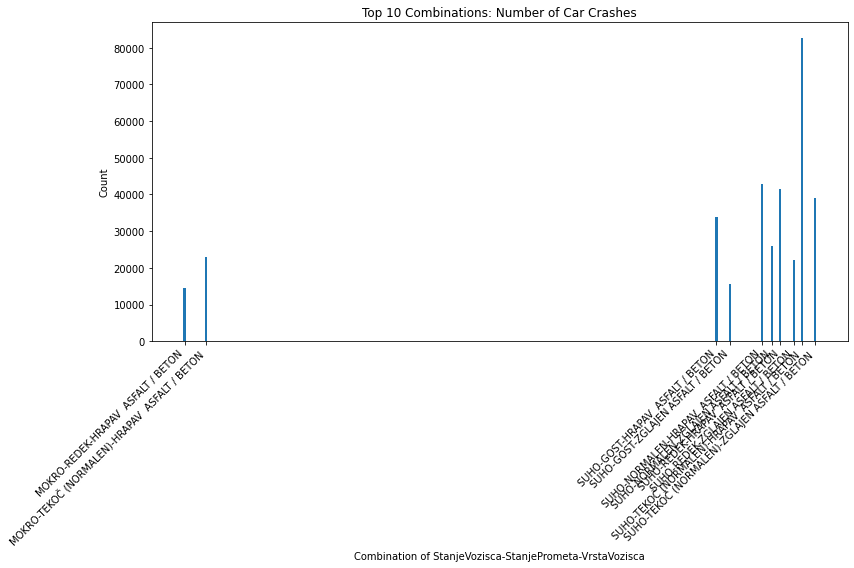

In [25]:
import matplotlib.pyplot as plt

# Select the top 10 combinations based on count
top_n = 10
top_combinations = result_df.head(top_n)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(top_combinations.index, top_combinations['Count'])
plt.xticks(top_combinations.index, top_combinations['StanjeVozisca'] + '-' +
           top_combinations['StanjePrometa'] + '-' + top_combinations['VrstaVozisca'], rotation=45, ha='right')
plt.xlabel('Combination of StanjeVozisca-StanjePrometa-VrstaVozisca')
plt.ylabel('Count')
plt.title(f'Top {top_n} Combinations: Number of Car Crashes')
plt.tight_layout()
plt.show()


## Napovedovanje vrednosti

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

dataAll['pijan_voznik'] = np.where((dataAll['VrednostAlkotesta'] > 0.24) & (dataAll['Starost'] >= 21) | (dataAll['VrednostAlkotesta'] > 0.0) & (dataAll['Starost'] < 21), 1, 0)

dataWithoutAlcohol = dataAll.drop(columns=['VrednostAlkotesta', 'VrednostStrokovnegaPregleda'])


def linear_regression(matrix, test_size=0.25):
    y = matrix["pijan_voznik"].values

    X = matrix.drop(columns=["pijan_voznik"])

    avg_rmse = 0
    avg_mae = 0
    avg_score = 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    
    avg_rmse += np.sqrt(mean_squared_error(y_test, y_pred))
    avg_mae += mean_absolute_error(y_test, y_pred)
    avg_score += model.score(X_test, y_test)
    rmse = avg_rmse
    mae = avg_mae
    score = avg_score

        
        
    print(f"Avg RMSE: {rmse}")
    print(f"Avg MAE: {mae}")
    print(f"Avg R2: {score}")

#linear_regression(dataWithoutAlcohol)

dataWithoutAlcohol

,ZaporednaStevilkaPN,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,StacionazaDogodka,OpisKraja,VzrokNesrece,TipNesrece,VremenskeOkoliscine,StanjePrometa,StanjeVozisca,VrstaVozisca,GeoKoordinataX,GeoKoordinataY,ZaporednaStevilkaOsebeVPN,Povzrocitelj,Starost,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,year,pijan_voznik
0,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,2009-01-04,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,0,NI ODSEKOV,17000,CESTA,NEPRAVILNA STRAN / SMER VOŽNJE,TRČENJE V OBJEKT,JASNO,REDEK,SUHO,HRAPAV ASFALT / BETON,0,0,1001,POVZROČITELJ,20,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,HUDA TELESNA POŠKODBA,VOZNIK OSEBNEGA AVTOMOBILA,NE,0,10,2009,1
1,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,2009-01-04,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,0,NI ODSEKOV,17000,CESTA,NEPRAVILNA STRAN / SMER VOŽNJE,TRČENJE V OBJEKT,JASNO,REDEK,SUHO,HRAPAV ASFALT / BETON,0,0,1002,UDELEŽENEC,23,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,2009,0
2,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,2009-01-04,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,0,NI ODSEKOV,17000,CESTA,NEPRAVILNA STRAN / SMER VOŽNJE,TRČENJE V OBJEKT,JASNO,REDEK,SUHO,HRAPAV ASFALT / BETON,0,0,1003,UDELEŽENEC,22,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,2009,0
3,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,2009-01-04,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,0,NI ODSEKOV,17000,CESTA,NEPRAVILNA STRAN / SMER VOŽNJE,TRČENJE V OBJEKT,JASNO,REDEK,SUHO,HRAPAV ASFALT / BETON,0,0,1004,UDELEŽENEC,22,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,2009,0
4,2,Z MATERIALNO ŠKODO,HRASTNIK,2009-01-03,20.15,NE,CESTA,REGIONALNA CESTA,00221,TROJANE-IZLAKE-ŠMARJETA,1222,HRASTNIK-ŠMARJETA,500,CESTA,NEPRILAGOJENA HITROST,BOČNO TRČENJE,OBLAČNO,NORMALEN,SPOLZKO,HRAPAV ASFALT / BETON,110545,507847,2001,UDELEŽENEC,27,ŽENSKI,HRASTNIK,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,6,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486710,18725,Z MATERIALNO ŠKODO,LJUBLJANA,2022-12-23,17.55,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,25001,LJUBLJANA,27012,CELOVŠKA CESTA,150,CESTA,PREMIKI Z VOZILOM,TRČENJE V STOJEČE / PARKIRANO VOZILO,JASNO,GOST,MOKRO,ASFALT,103875,460288,18725002,UDELEŽENEC,53,MOŠKI,LJUBLJANA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,33,6,2022,0
486711,18726,Z MATERIALNO ŠKODO,SEŽANA,2022-12-28,17.00,DA,NASELJE,NASELJE BREZ ULIČNEGA SISTEMA,48072,KRIŽ-SEŽANA,0,NI ODSEKOV,71,CESTA,NEPRILAGOJENA HITROST,BOČNO TRČENJE,NEZNANO,NEZNANO,OSTALO,MAKADAM,67520,411190,18726001,UDELEŽENEC,78,ŽENSKI,LJUBLJANA,SLOVENIJA,BREZ POŠKODBE,OSTALO,NEZNANO,0,0,2022,0
486712,18727,Z MATERIALNO ŠKODO,LJUBLJANA,2022-11-25,7.30,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,25001,LJUBLJANA,25100,MIKLOŠIČEVA CESTA,5,CESTA,PREMIKI Z VOZILOM,TRČENJE V OBJEKT,NEZNANO,REDEK,SUHO,ASFALT,101635,461820,18727001,POVZROČITELJ,44,MOŠKI,DOMŽALE,SLOVENIJA,BREZ POŠKODBE,VOZNIK TOVORNEGA VOZILA,DA,0,0,2022,0
486713,18728,Z MATERIALNO ŠKODO,LJUBLJANA,2022-11-10,19.47,DA,CESTA,GLAVNA CESTA,00008,LJ ŠENTVID-OBVOZNICA,213,LJ ŠENTVID - OBVOZNICA,2300,CESTA,PREMIKI Z VOZILOM,BOČNO TRČENJE,OBLAČNO,TEKOČ (NORMALEN),MOKRO,ASFALT,105013,459602,18728001,UDELEŽENEC,56,MOŠKI,KRANJ,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,34,8,2022,0
